# Bias, Variance, and the Bias-variance Trade-off

Here we'll spend time visualizing what it means for an estimator to be biased, what the variance of an estimator represents, and why there is an inherent trade-off between bias and variance. We'll do this with the simple example of estimating the mean and variance of a scalar Gaussian distribution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Standard normal distribution
mu = 0
sigma_2 = 1

First, suppose the mean is unknown but the variance known. Let's use the sample mean estimator, taken from n i.i.d. samples. To understand the estimator as a random variable, we'll loop over many *different* realizations of the data and its estimator.

The histogram shows us that mu_hat is a Gaussian distribution. Its mean is clearly zero, which means that it's unbiased! And its variance is proportional to 1/n

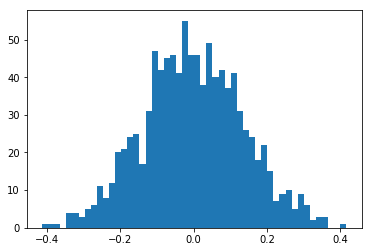

In [5]:
NUM_SAMPLES = 1000
n = 50

mu_hat = np.zeros(NUM_SAMPLES)
for i in range(0,NUM_SAMPLES):
    y = np.random.randn(n) #n i.i.d. samples
    mu_hat[i] = np.mean(y)

plt.hist(mu_hat,50)
plt.show()
    

Next, let's try using the sample *variance* estimator, supposing that the mean and variance are both unknown. We want to see that this estimator is in fact biased!

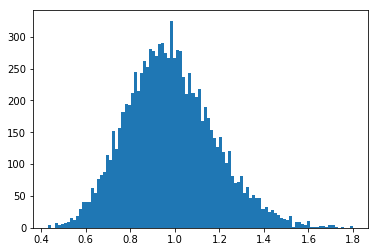

In [7]:
NUM_SAMPLES = 10000
n = 50

sigma_2_hat = np.zeros(NUM_SAMPLES)
for i in range(0,NUM_SAMPLES):
    y = np.random.randn(n) #n i.i.d. samples
    mu_hat = np.mean(y)
    sigma_2_hat[i] = np.mean((y - mu_hat)**2)

plt.hist(sigma_2_hat,100)
plt.show()

Notice a few things. First, the sample variance is *not* Gaussian. In fact, it is distributed according to a *chi-square* distribution, which is roughly the distribution of the *square* of a Gaussian random variable. Second, and more important, the mean of this distribution is clearly not one. This is because the sample variance is biased by the constant $(n-1)/n)$. If we increase $n$, we get a distribution that is closer to being unbiased.

Finally, let's look at the bias variance trade-off by altering the sample mean estimator from above. We'll see that by "overdoing" the averaging of samples, we can reduce the variance of the estimator, but we add bias.

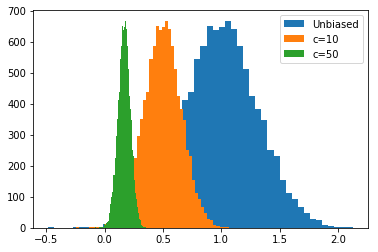

In [8]:
NUM_SAMPLES = 10000
n = 10
c1 = 10
c2 = 50

mu_hat_ub = np.zeros(NUM_SAMPLES) #unbiased estimate
mu_hat_b1 = np.zeros(NUM_SAMPLES) #first biased estimate
mu_hat_b2 = np.zeros(NUM_SAMPLES) #second biased estimate
for i in range(0,NUM_SAMPLES):
    y = np.random.randn(n) + 1#n i.i.d. samples where the mean is 1!
    mu_hat_ub[i] = np.mean(y)
    mu_hat_b1[i] = n/(n+c1)*np.mean(y)
    mu_hat_b2[i] = n/(n+c2)*np.mean(y)

plt.hist(mu_hat_ub,50)
plt.hist(mu_hat_b1,50)
plt.hist(mu_hat_b2,50)
plt.gca().legend(['Unbiased','c='+str(c1),'c='+str(c2)])
plt.show()